In [1]:
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras import backend as K
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import tensorflow as tf




In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files
train_healthy = "D:\Sem8\dl codes\Assignment-3a\Plant\Train\Train\Healthy"
train_powdery = "D:\Sem8\dl codes\Assignment-3a\Plant\Train\Train\Powdery"
train_rust ="D:\Sem8\dl codes\Assignment-3a\Plant\Train\Train\Rust"

test_healthy ="D:\Sem8\dl codes\Assignment-3a\Plant\Test\Test\Healthy"
test_powdery ="D:\Sem8\dl codes\Assignment-3a\Plant\Test\Test\Powdery"
test_rust ="D:\Sem8\dl codes\Assignment-3a\Plant\Test\Test\Rust"

valid_healthy = "D:\Sem8\dl codes\Assignment-3a\Plant\Validation\Validation\Healthy"
valid_powdery ="D:\Sem8\dl codes\Assignment-3a\Plant\Validation\Validation\Powdery"
valid_rust ="D:\Sem8\dl codes\Assignment-3a\Plant\Validation\Validation\Rust"

In [3]:
print("Number of healthy leaf images in training set", total_files(train_healthy))
print("Number of powder leaf images in training set", total_files(train_powdery))
print("Number of rusty leaf images in training set", total_files(train_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_healthy))
print("Number of powder leaf images in test set", total_files(test_powdery))
print("Number of rusty leaf images in test set", total_files(test_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_healthy))
print("Number of powder leaf images in validation set", total_files(valid_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


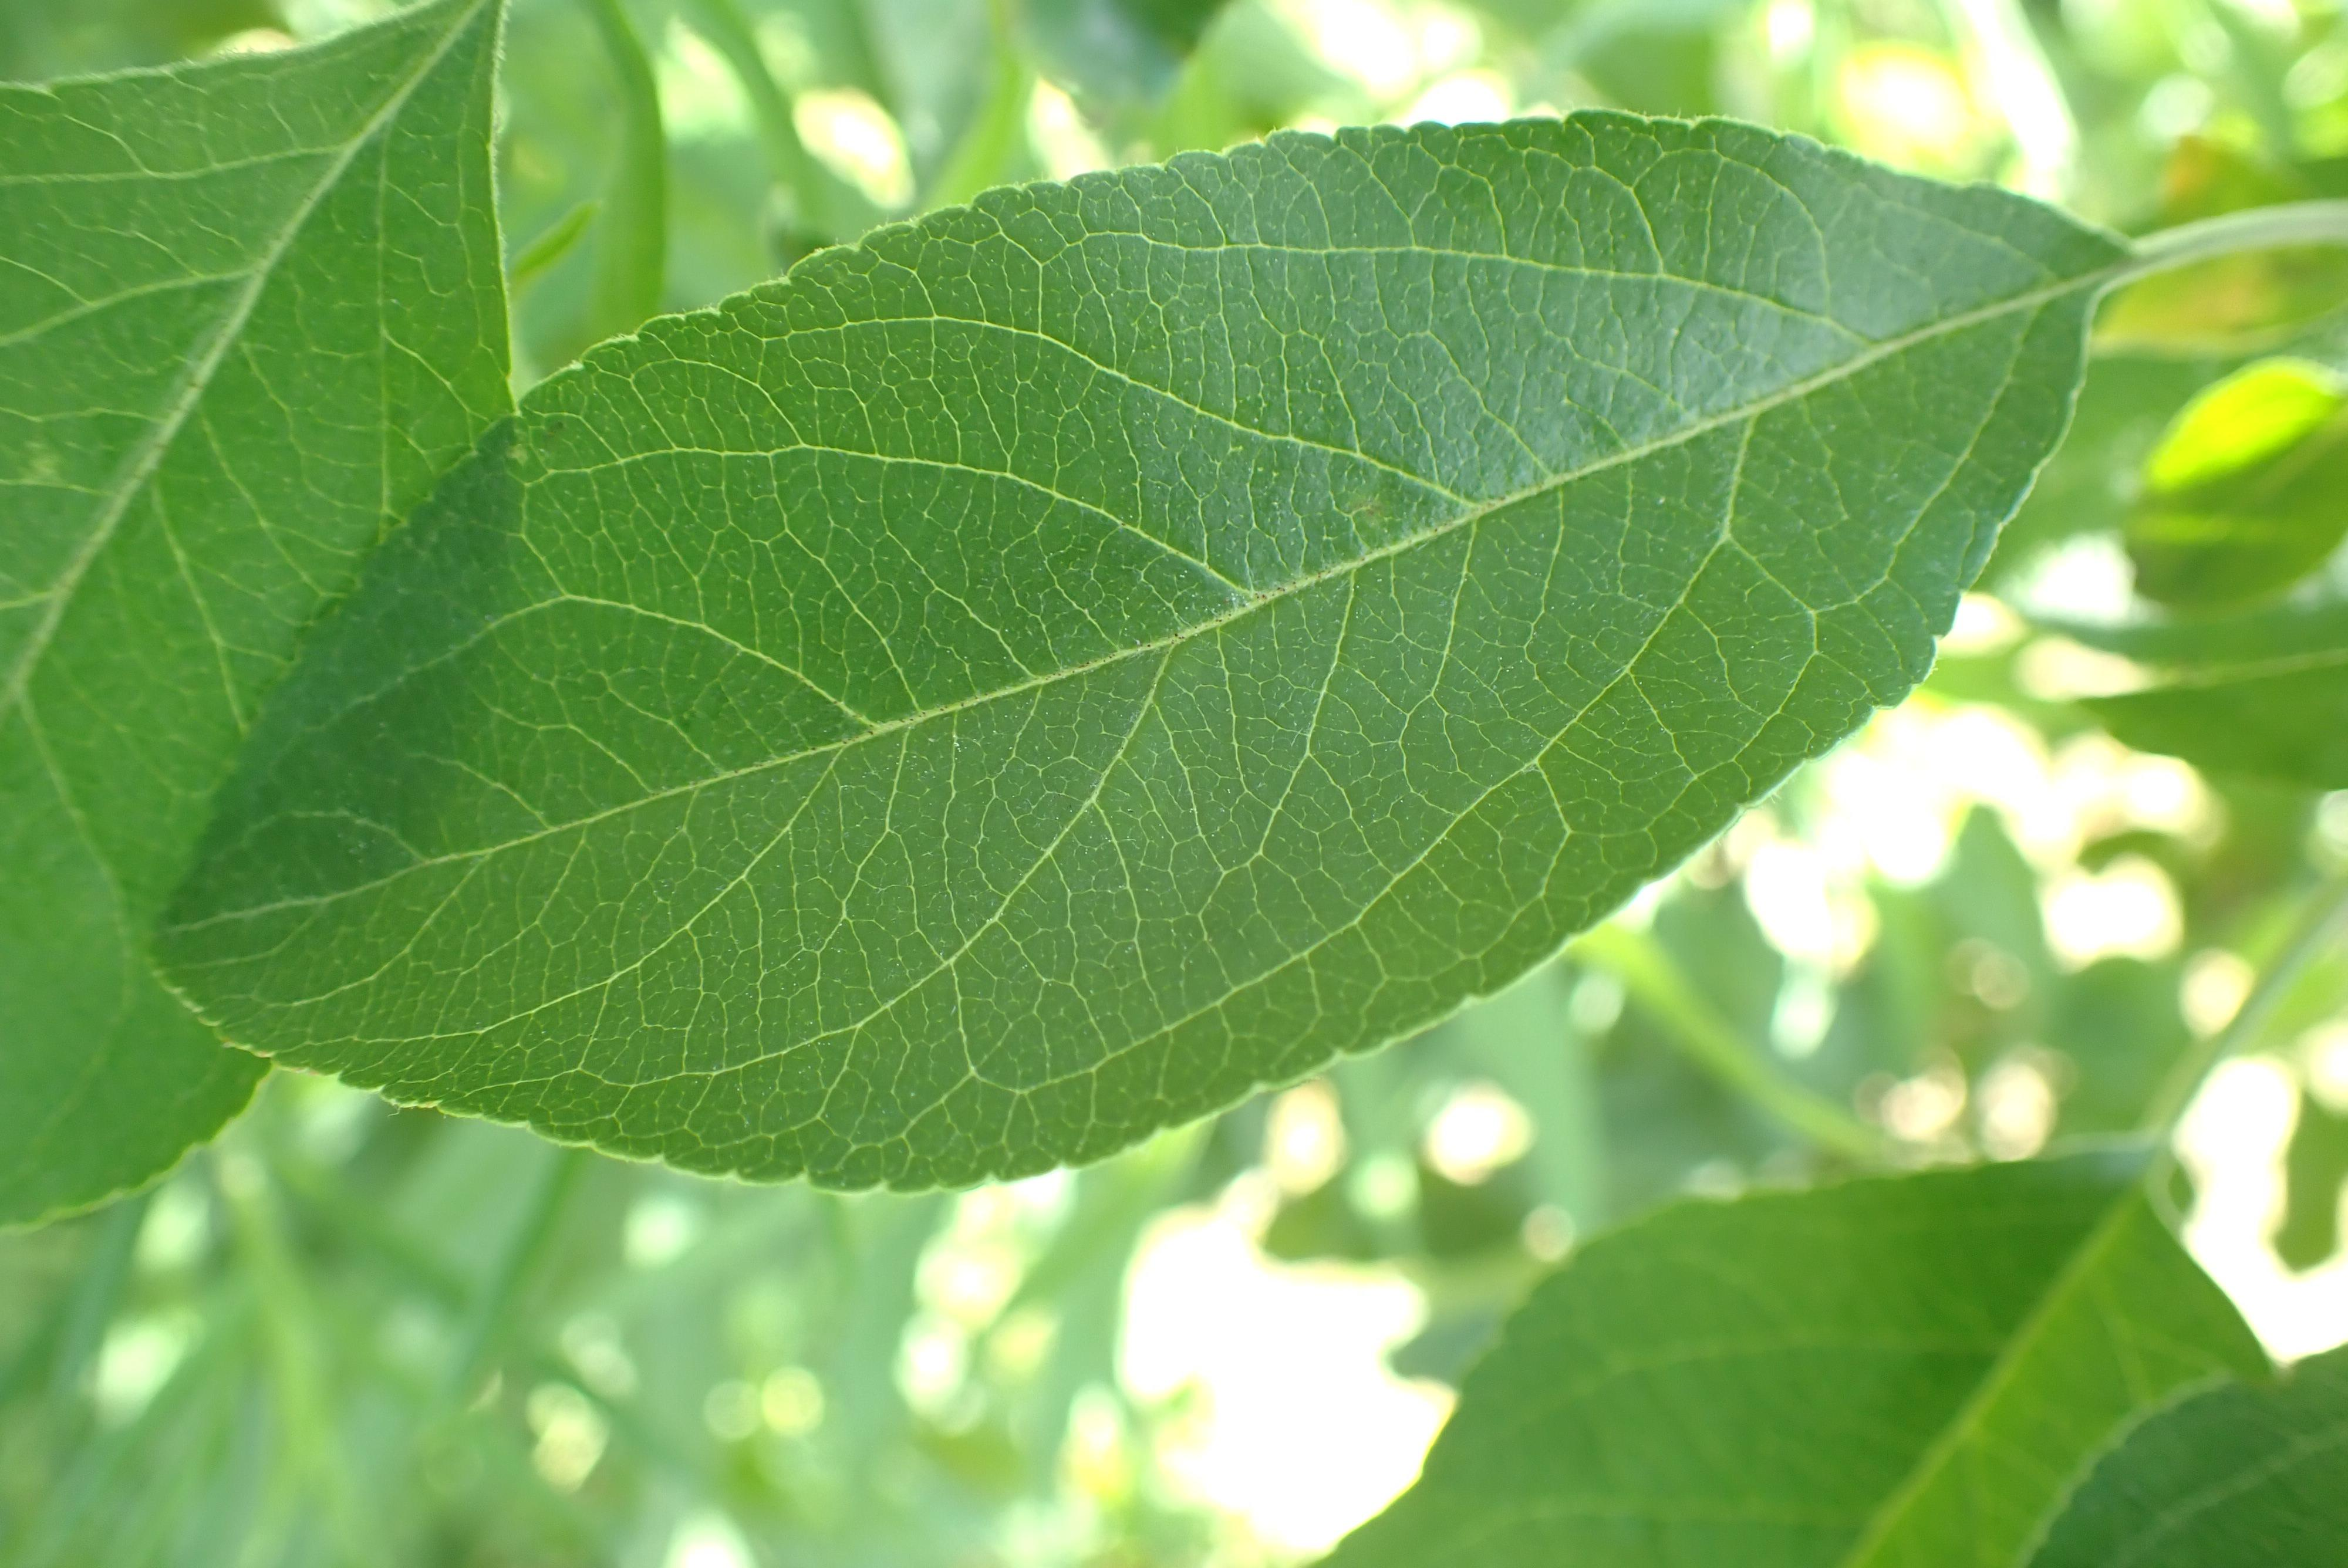

In [4]:
from PIL import Image
import IPython.display as display

image_path = 'D:\Sem8\dl codes\Assignment-3a\Plant\Train\Train\Healthy\8d37caa695c9329a.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

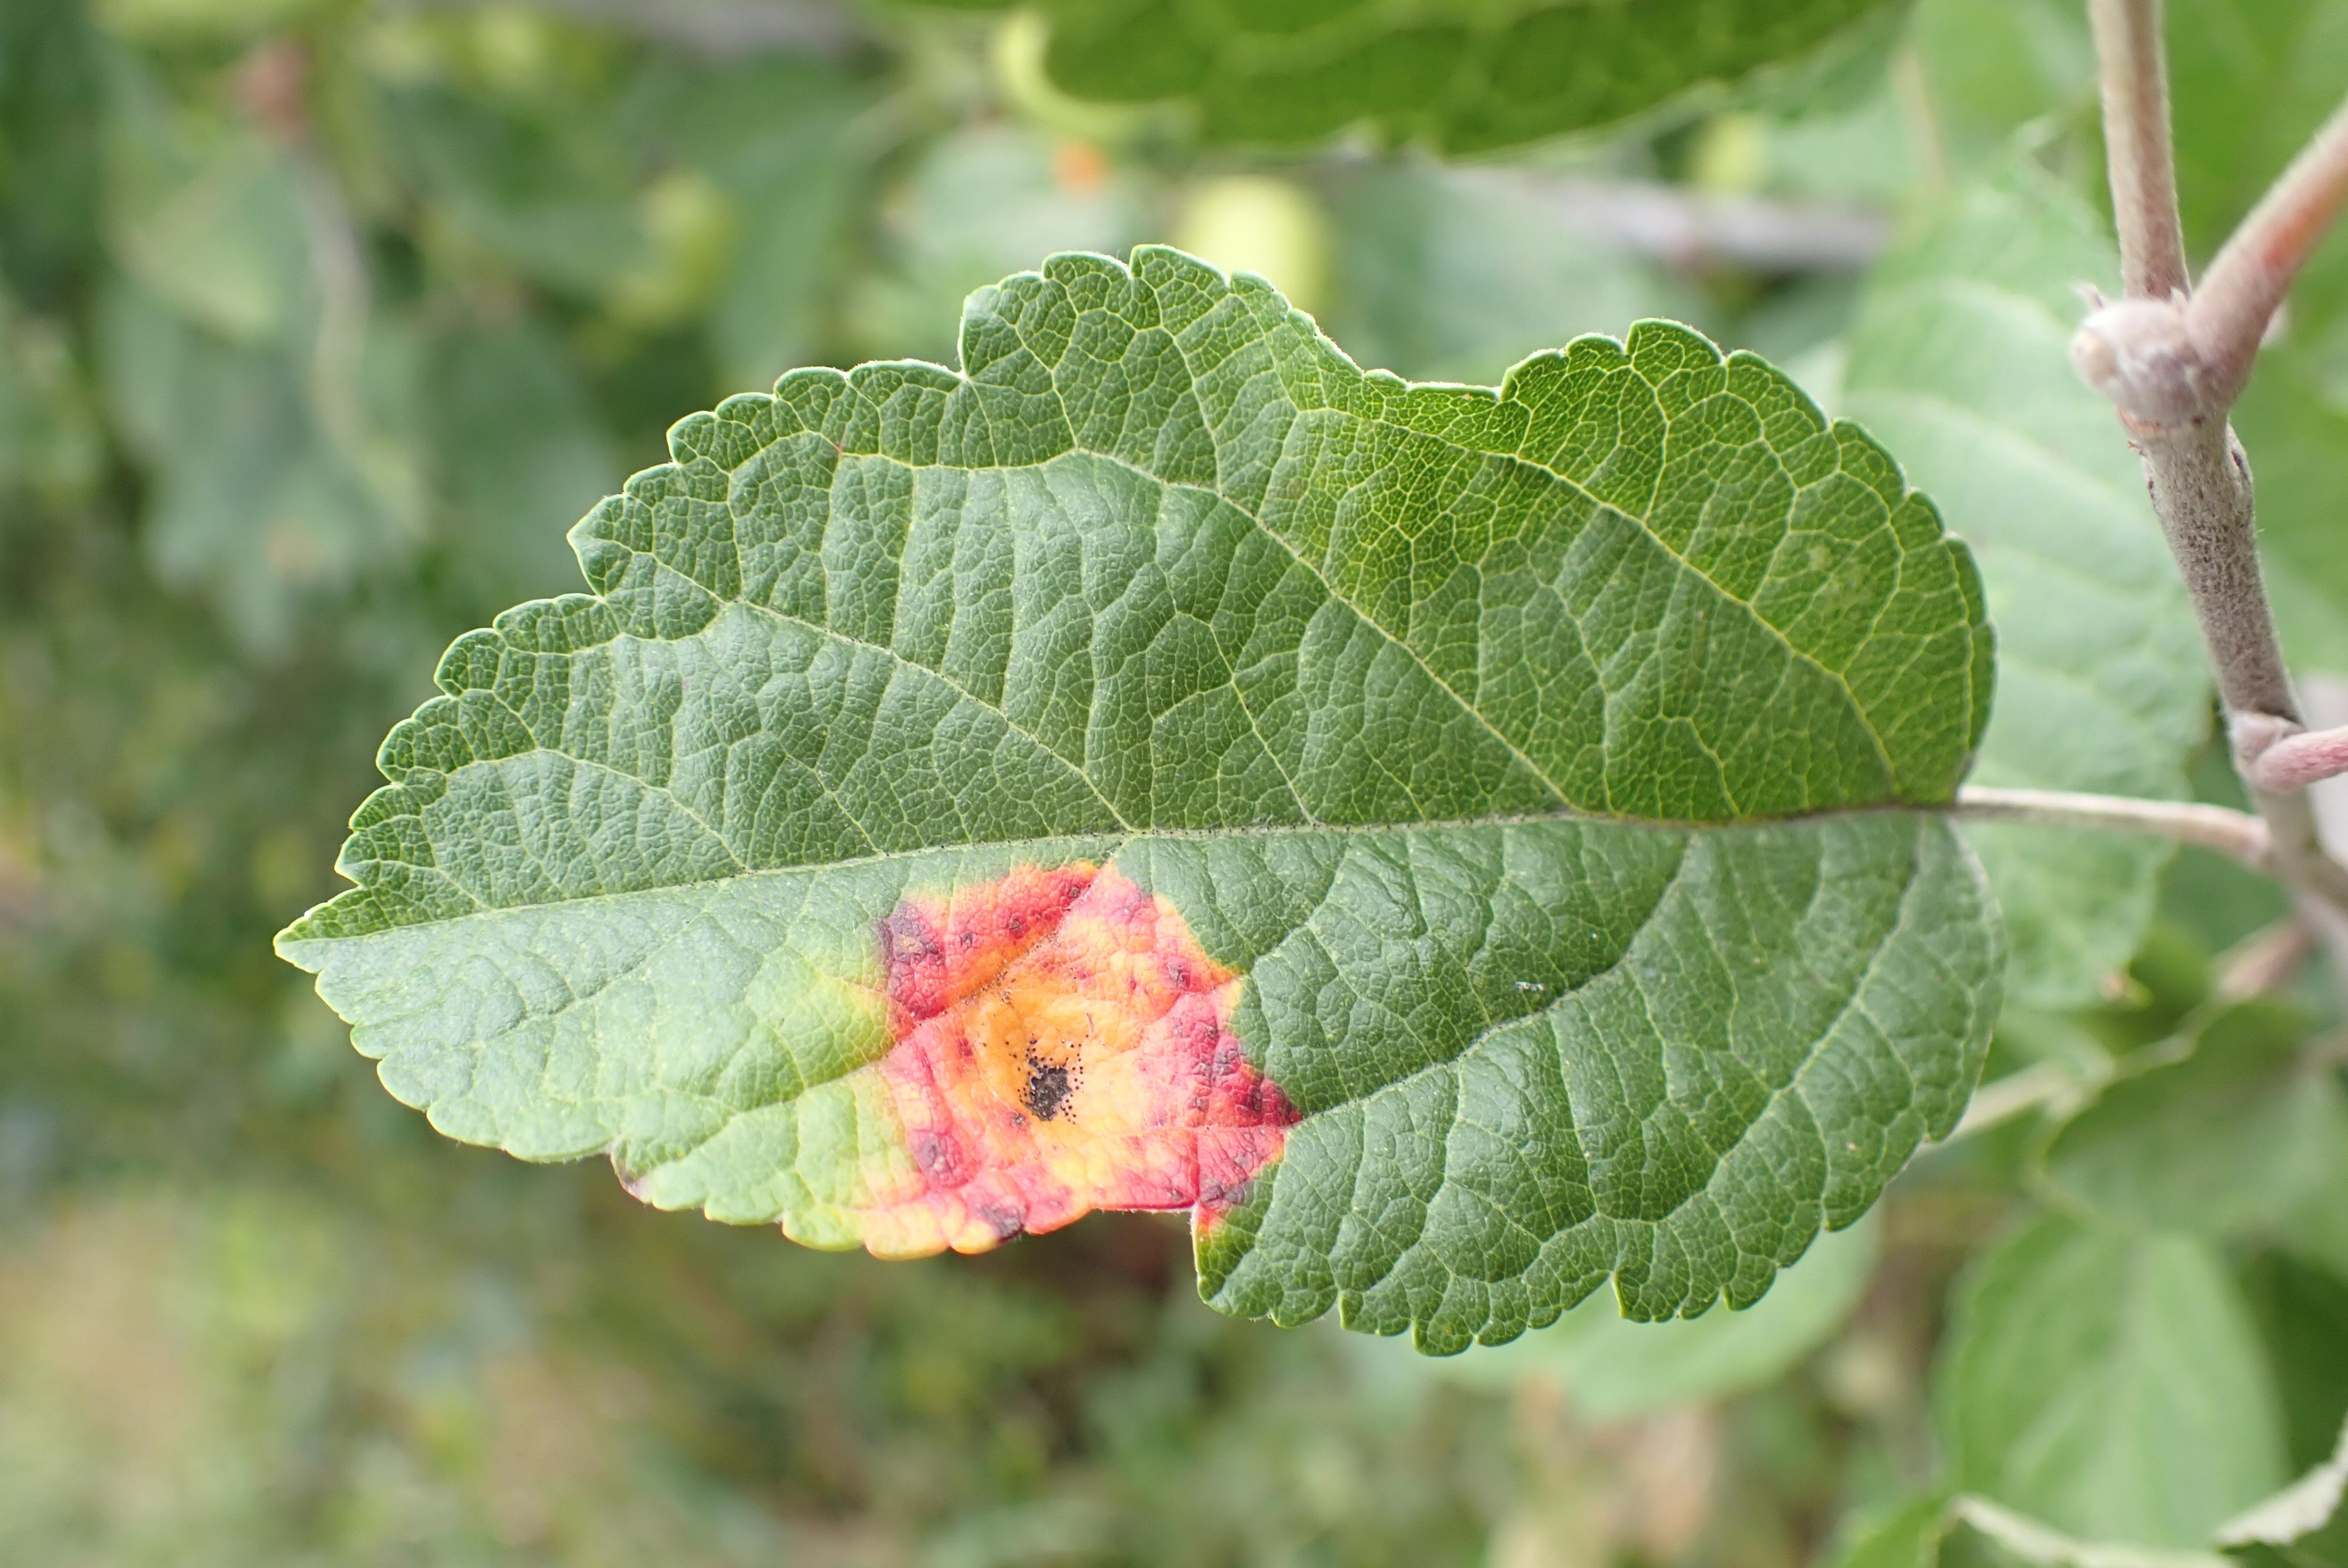

In [5]:
from PIL import Image
import IPython.display as display

image_path = 'D:\Sem8\dl codes\Assignment-3a\Plant\Train\Train\Rust\8d0c3cc4636fc47d.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory('D:\Sem8\dl codes\Assignment-3a\Plant\Train\Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('D:\Sem8\dl codes\Assignment-3a\Plant\Validation\Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(225, 225, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


C:\Users\ABHISHEK\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=4,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 355s 7s/step - accuracy: 0.3947 - loss: 4.2034 - val_accuracy: 0.6500 - val_loss: 0.7744
Epoch 2/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 242s 5s/step - accuracy: 0.6885 - loss: 0.7402 - val_accuracy: 0.8167 - val_loss: 0.5163
Epoch 3/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.8425 - loss: 0.4454 - val_accuracy: 0.7833 - val_loss: 0.5138
Epoch 4/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.8379 - loss: 0.4096 - val_accuracy: 0.7833 - val_loss: 0.4919


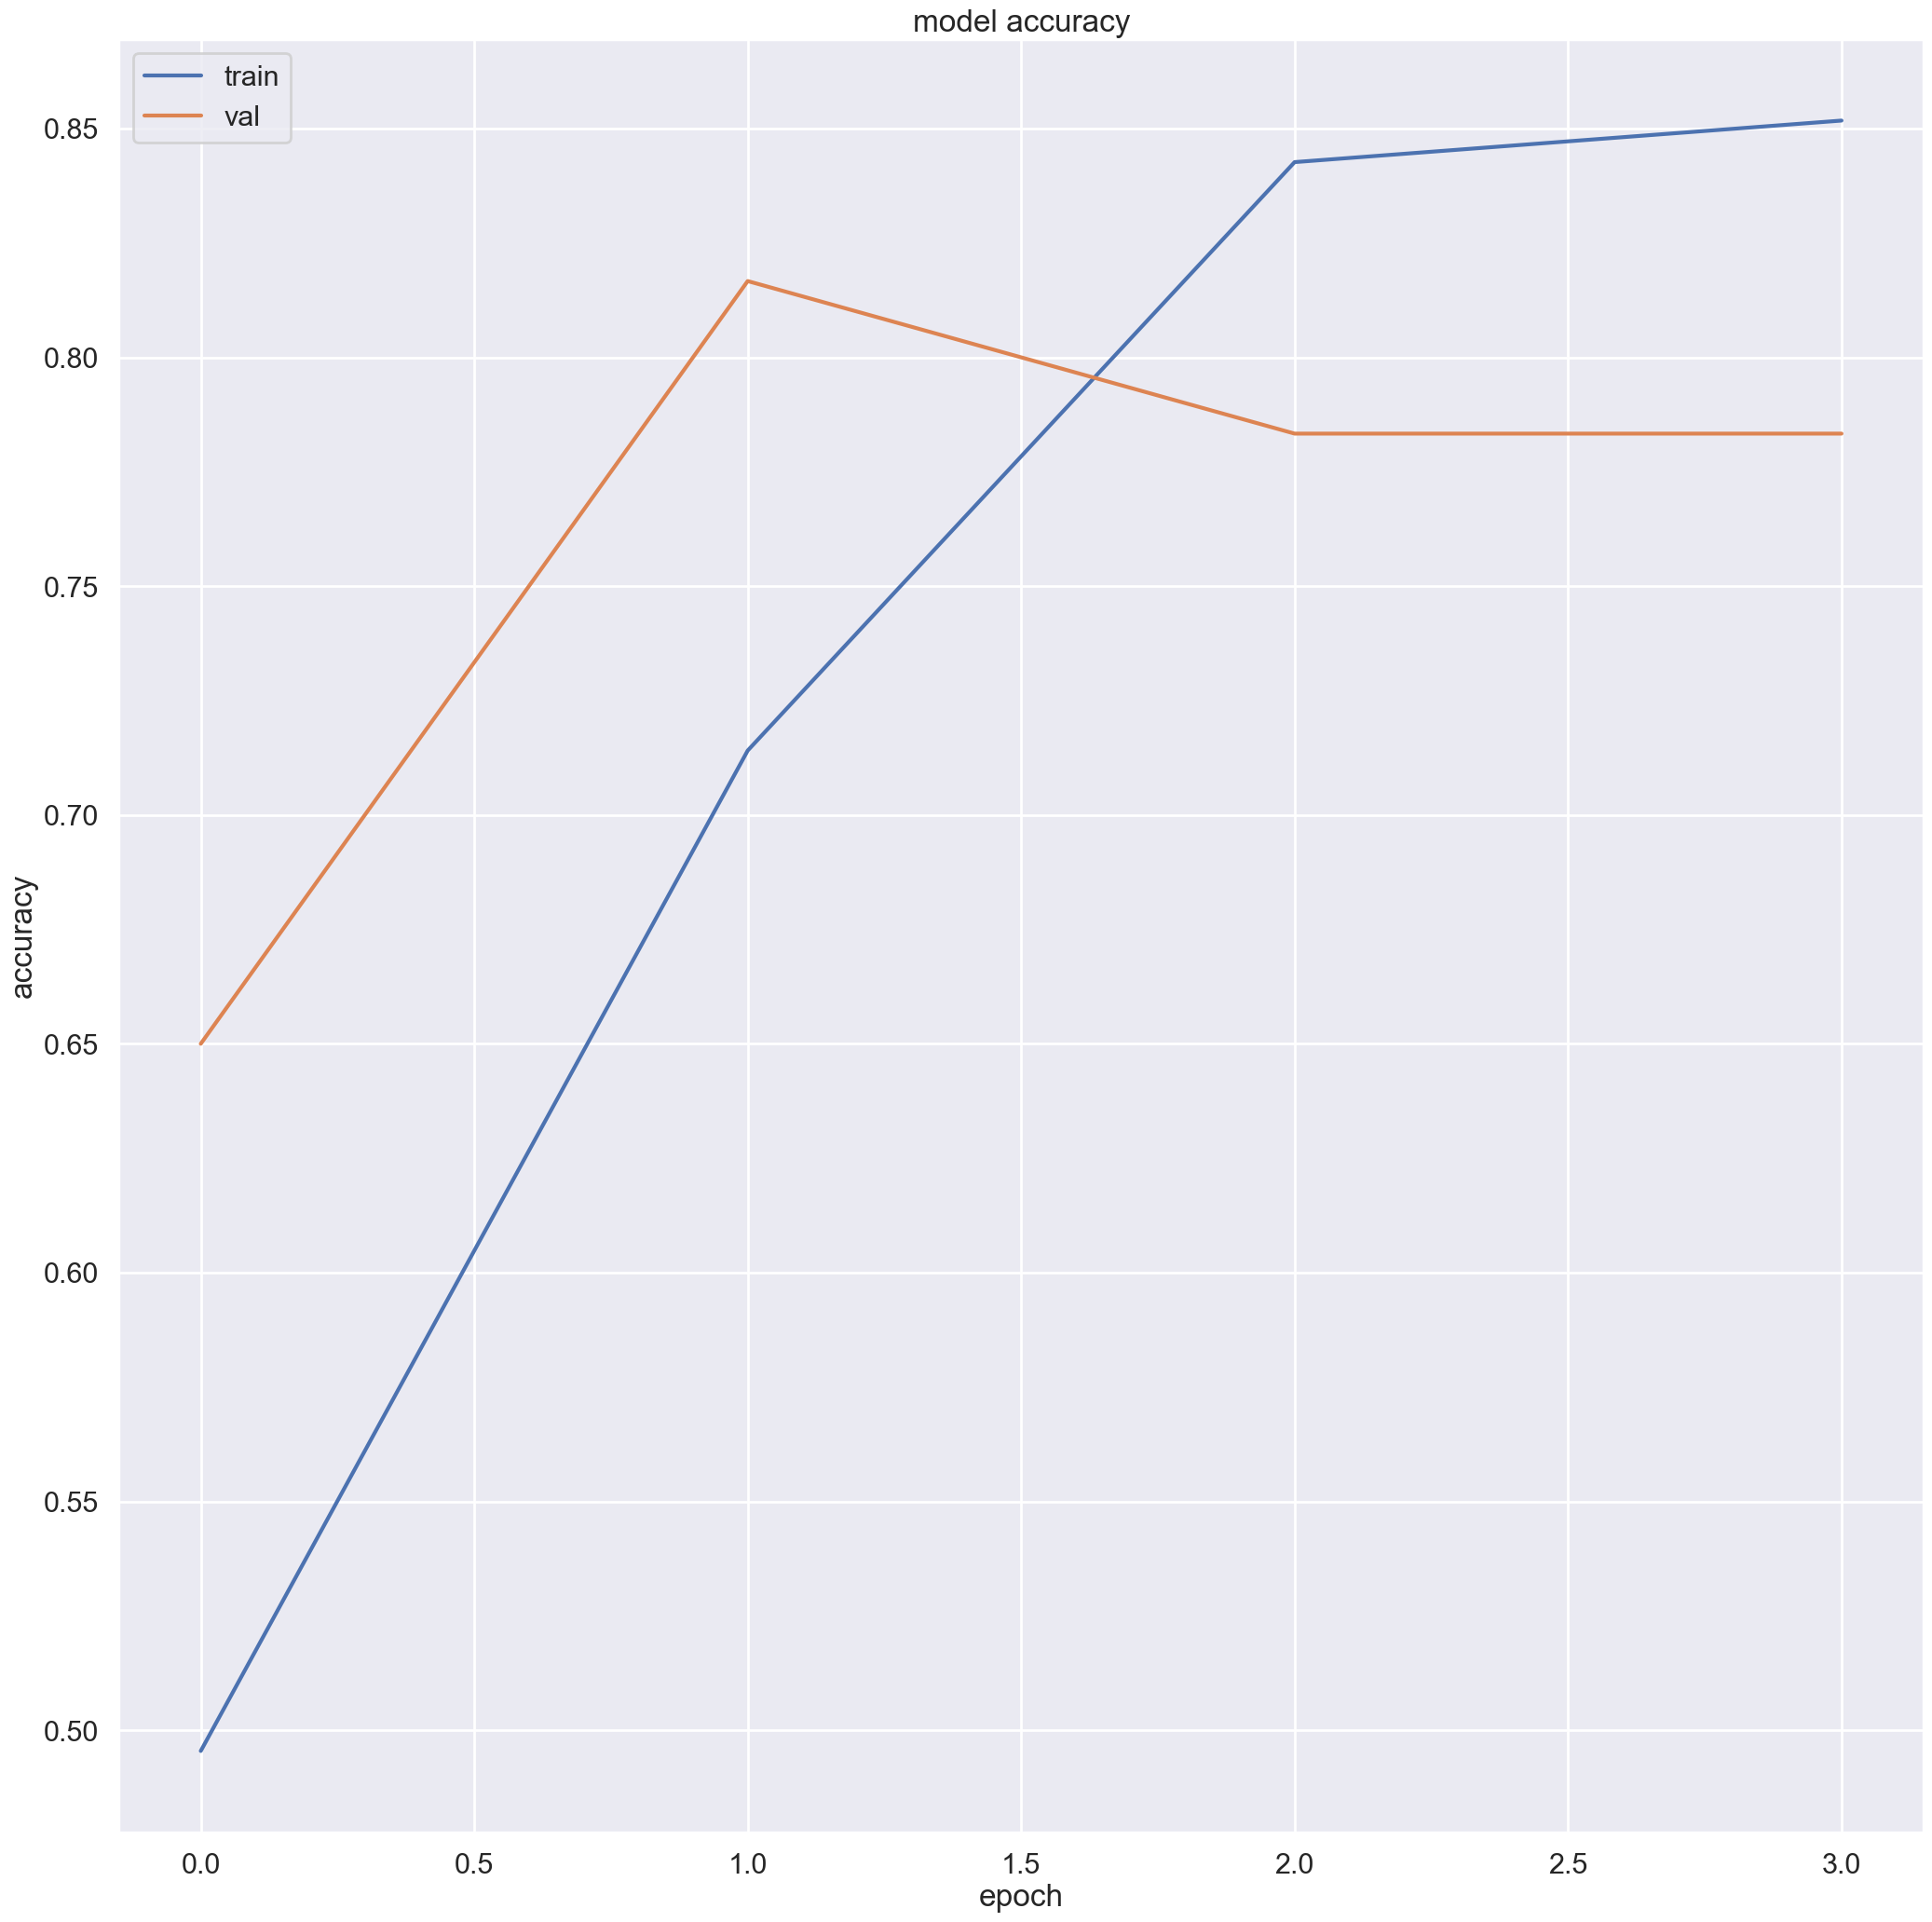

In [12]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('D:\Sem8\dl codes\Assignment-3a\Plant\Train\Train\Rust\8aa78fd5c6c0cec2.jpg')
x

array([[[[0.60784316, 0.6039216 , 0.59607846],
         [0.6313726 , 0.6313726 , 0.62352943],
         [0.6313726 , 0.6313726 , 0.62352943],
         ...,
         [0.8862745 , 0.9019608 , 0.79607844],
         [0.8745098 , 0.9019608 , 0.77254903],
         [0.85490197, 0.89411765, 0.7607843 ]],

        [[0.59607846, 0.5882353 , 0.5921569 ],
         [0.6313726 , 0.6313726 , 0.62352943],
         [0.6156863 , 0.6156863 , 0.60784316],
         ...,
         [0.8901961 , 0.90588236, 0.8       ],
         [0.8784314 , 0.9019608 , 0.7921569 ],
         [0.8666667 , 0.90588236, 0.77254903]],

        [[0.627451  , 0.62352943, 0.6039216 ],
         [0.6117647 , 0.6117647 , 0.6039216 ],
         [0.6117647 , 0.6117647 , 0.6039216 ],
         ...,
         [0.88235295, 0.8980392 , 0.7921569 ],
         [0.8627451 , 0.8862745 , 0.7764706 ],
         [0.8509804 , 0.8901961 , 0.75686276]],

        ...,

        [[0.63529414, 0.8235294 , 0.59607846],
         [0.6431373 , 0.81960785, 0.5882353 ]

In [14]:
model.save('leaf_desease.h5')

In [15]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('leaf_desease.h5')


In [16]:
predictions = loaded_model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([6.1859936e-03, 4.1106035e-04, 9.9340302e-01], dtype=float32)

In [17]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [18]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust


In [19]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the function to preprocess the image
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

# Define the function to make predictions
def predict_image(image_path):
    x = preprocess_image(image_path)
    predictions = model.predict(x)
    predicted_label = labels[np.argmax(predictions)]
    return predicted_label

# Function to handle image selection and prediction
def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        predicted_label = predict_image(file_path)
        label.config(text="Predicted Label: " + predicted_label)
        # Display the selected image
        img = Image.open(file_path)
        img.thumbnail((300, 300))
        img = ImageTk.PhotoImage(img)
        panel.configure(image=img)
        panel.image = img

# Create the main application window
root = tk.Tk()
root.title("Image Classifier")

# Create a label for displaying predictions
label = tk.Label(root, text="")
label.pack()

# Create a panel for displaying images
panel = tk.Label(root)
panel.pack()

# Create a button to select an image
button = tk.Button(root, text="Select Image", command=select_image)
button.pack()

# Load your trained model and class labels
model = model # Load your model here
labels = labels  # Load your class labels here

# Start the Tkinter event loop
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
